In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score
import joblib


In [ ]:
df = pd.read_csv('survey lung cancer.csv')

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

np.int64(33)

# Data Preprocessing

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])


/tmp/ipython-input-3062310666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
/tmp/ipython-input-3062310666.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])


In [ ]:
df['LUNG_CANCER'].unique()
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


In [ ]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Training**

## Random Forest

Random Forest Accuracy: 0.9107
Confusion Matrix:
 [[ 6  2]
 [ 3 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.96      0.94      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.84      0.83        56
weighted avg       0.92      0.91      0.91        56



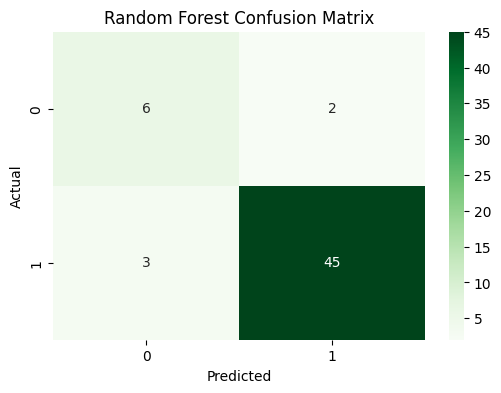

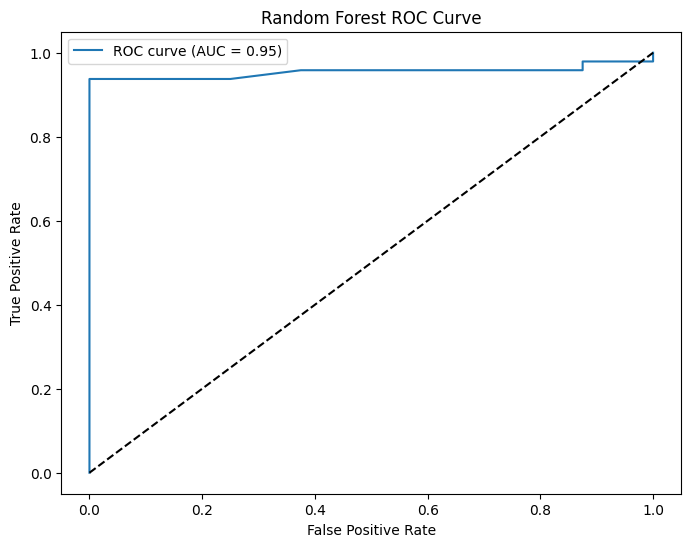

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

results['Random Forest'] = {
    'Accuracy': accuracy,
    'AUC': auc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-score': report['1']['f1-score']
}

## Decision Tree

Decision Tree Accuracy: 0.9107
Confusion Matrix:
 [[ 7  1]
 [ 4 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.98      0.92      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.90      0.84        56
weighted avg       0.93      0.91      0.92        56



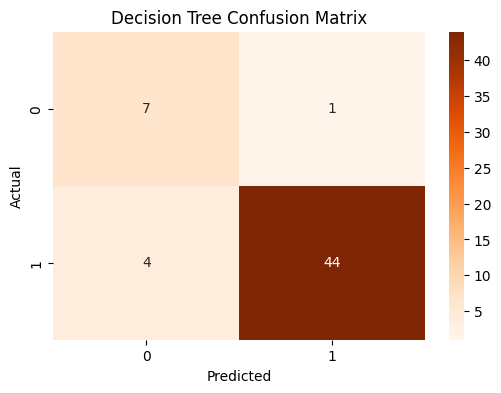

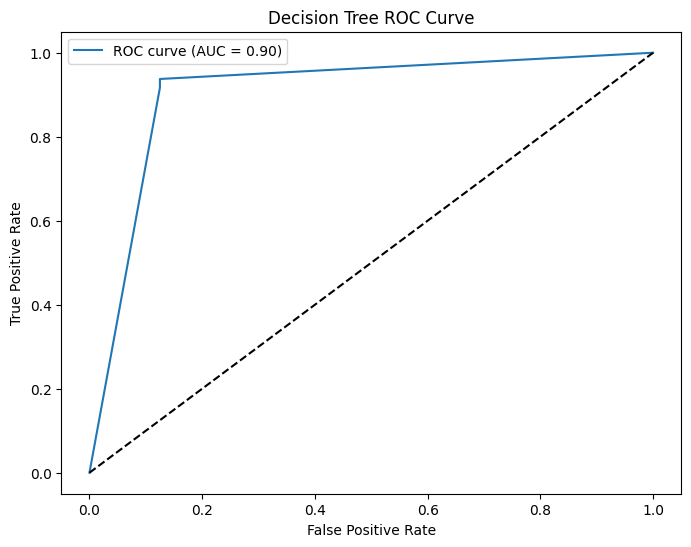

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ROC Curve
y_pred_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()

results['Decision Tree'] = {
    'Accuracy': accuracy,
    'AUC': auc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-score': report['1']['f1-score']
}

## Support Vector Machine

Support Vector Machine Accuracy: 0.9286
Confusion Matrix:
 [[ 7  1]
 [ 3 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.98      0.94      0.96        48

    accuracy                           0.93        56
   macro avg       0.84      0.91      0.87        56
weighted avg       0.94      0.93      0.93        56



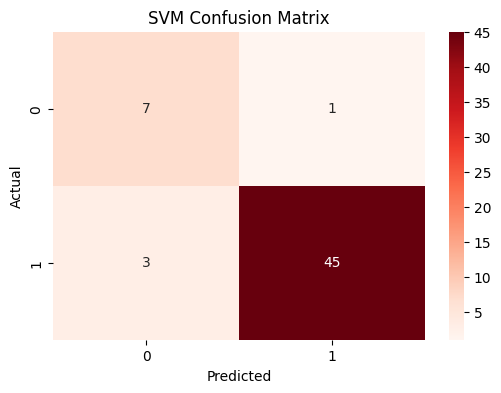

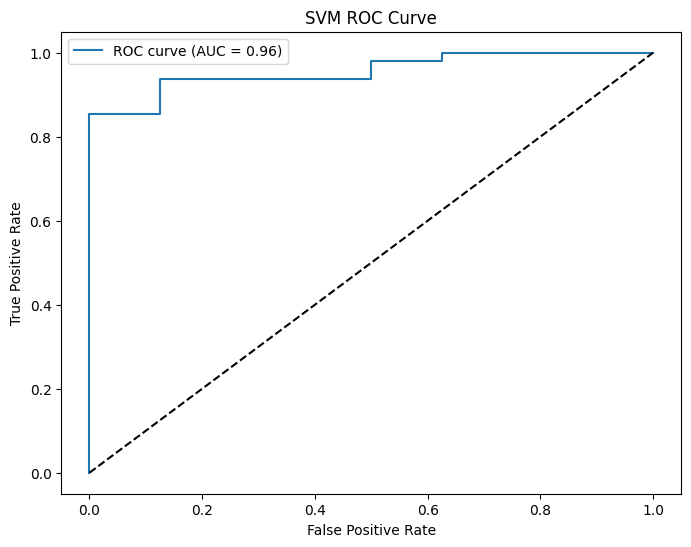

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Support Vector Machine Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve
y_pred_prob = svm.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()

results['SVM'] = {
    'Accuracy': accuracy,
    'AUC': auc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-score': report['1']['f1-score']
}

## Perceptron

Perceptron Accuracy: 0.8929
Confusion Matrix:
 [[ 5  3]
 [ 3 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        48

    accuracy                           0.89        56
   macro avg       0.78      0.78      0.78        56
weighted avg       0.89      0.89      0.89        56



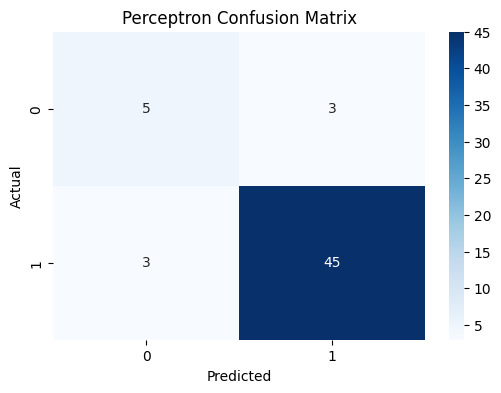

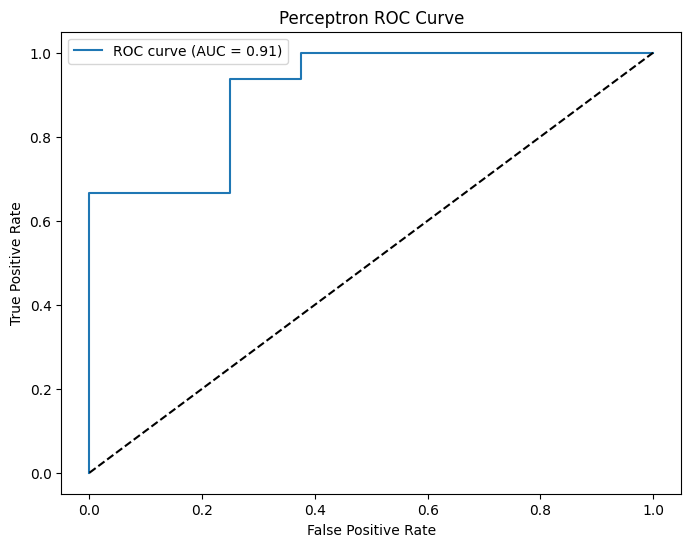

In [ ]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train_scaled, y_train)
y_pred = perceptron.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Perceptron Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Perceptron Confusion Matrix")
plt.show()

# ROC Curve
y_scores = perceptron.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Perceptron ROC Curve")
plt.legend()
plt.show()

results['Perceptron'] = {
    'Accuracy': accuracy,
    'AUC': auc,
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-score': report['1']['f1-score']
}

In [ ]:
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,AUC,Precision,Recall,F1-score
SVM,0.928571,0.955729,0.978261,0.937500,0.957447
Random Forest,0.910714,0.954427,0.957447,0.937500,0.947368
Decision Tree,0.910714,0.904948,0.977778,0.916667,0.946237
Perceptron,0.892857,0.908854,0.937500,0.937500,0.937500


In [79]:
joblib.dump(rf, "lungcancer_rf.pkl")
print("Model saved successfully!")

Model saved successfully!


In [83]:
X_test.to_csv("lung_cancer_X_test.csv", index=False)
y_test.to_csv("lung_cancer_y_test.csv", index=False)